In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import imblearn
from numpy import where
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATA-LUAN_VAN/data_gps.csv')
# data.head()

In [ ]:
def getDataById(Id):
  if Id ==None:
    df=data
  else:
    df=data[data.vehicle_id==Id]
  POINTS0=[]
  POINTS1=[]
  LABLE=[]
  POINTS=[]
  for index, row in data.iterrows():
    if row['label']==True:
      LABLE.append(1)
      LABLE.append(1)
      LABLE.append(1)
      POINTS1.append([row['START_LAT'],row['START_LON']])
      POINTS1.append([row['MID_LAT'],row['MID_LON']])
      POINTS1.append([row['END_LAT'],row['END_LON']])
    else:
      LABLE.append(0)
      LABLE.append(0)
      LABLE.append(0)
      POINTS0.append([row['START_LAT'],row['START_LON']])
      POINTS0.append([row['MID_LAT'],row['MID_LON']])
      POINTS0.append([row['END_LAT'],row['END_LON']])

    POINTS.append([row['START_LAT'],row['START_LON']])
    POINTS.append([row['MID_LAT'],row['MID_LON']])
    POINTS.append([row['END_LAT'],row['END_LON']])

  return POINTS, POINTS0,POINTS1,LABLE

28203
16380
44583


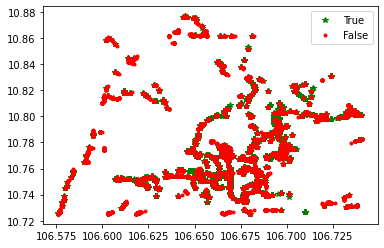

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
points,points0,points1,labels=getDataById(None)
# X0=np.array(points0)
# X1=np.array(points1)
Y=np.array(labels)
print(len(points0))
print(len(points1))
plt.plot(np.array(points1)[:, 1], np.array(points1)[:, 0], 'g*',label='True')
plt.plot(np.array(points0)[:, 1], np.array(points0)[:, 0], 'r.',label='False')
print(len (Y))
plt.legend(loc='best')
plt.plot()
plt.show()


56406
Counter({0: 28203, 1: 28203})


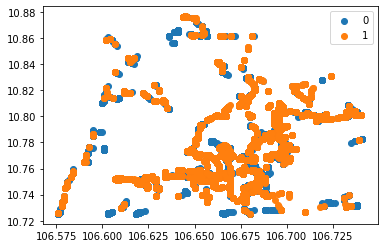

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Oversample and plot imbalanced dataset with SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(np.array(points), Y)
# len(np.array(points))
# 44583
# len(X)
print(len(y))
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()

0.6325953838907207
0.3674046161092793
Counter({0: 16380, 1: 16380})


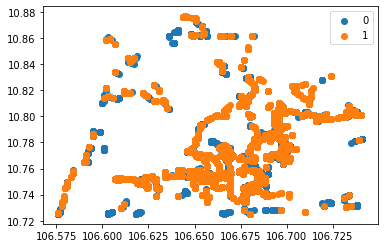

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy={1:16380})
under = RandomUnderSampler(sampling_strategy={0:16380})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
print(len(points0)/len(points))
print(len(points1)/len(points))
# transform the dataset
X, y = pipeline.fit_resample(np.array(points), np.array(labels))
# # summarize the new class distribution
counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()

In [ ]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, np.array(points), np.array(labels), scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.867


In [ ]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,  np.array(points), np.array(labels), scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.866


In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# 28203
# 16380
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
  model = DecisionTreeClassifier()
# define pipeline
  model = DecisionTreeClassifier()
  over = SMOTE(sampling_strategy={1:25000},k_neighbors=k)
  under = RandomUnderSampler(sampling_strategy={0:25000})
  # over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
  # under = RandomUnderSampler(sampling_strategy=0.5)
  steps = [('over', over), ('under', under), ('model', model)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, np.array(points), np.array(labels), scoring='roc_auc', cv=cv, n_jobs=-1)
  score = mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.866
> k=2, Mean ROC AUC: 0.866
> k=3, Mean ROC AUC: 0.866
> k=4, Mean ROC AUC: 0.866
> k=5, Mean ROC AUC: 0.866
> k=6, Mean ROC AUC: 0.866
> k=7, Mean ROC AUC: 0.866


SMOTE With Selective Synthetic Sample **Generation**

**Borderline-SMOTE**


Counter({0: 28203, 1: 28203})


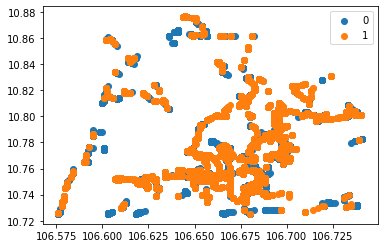

In [ ]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(np.array(points), np.array(labels))
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()

SVMSMOTE class from the imbalanced-learn library.



Counter({0: 28203, 1: 28203})


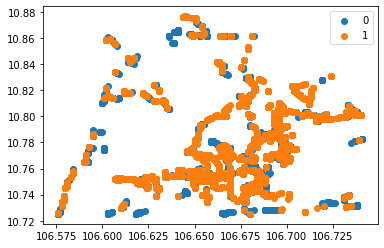

In [ ]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE

from numpy import where

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(np.array(points), np.array(labels))
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()

 ADASYN class in the imbalanced-learn library.



Counter({1: 29041, 0: 28203})


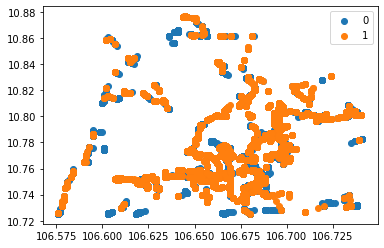

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

from numpy import where

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(np.array(points), np.array(labels))
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()